#### solucionando problema de clasificacion
#### dataset:http://archive.ics.uci.edu/ml/datasets/mammographic+mass
#### predecir si un tumor es benigno o maligno en dependencia de una serie de variable evitando la biopsia ya que el 70% de las biopsias son de resultado benigno.

In [ ]:
#Importqcion de las librerias necesarias para el modelaje de clasificacion

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, f1_score, recall_score

creamos la lectura de los datos

In [ ]:
df = pd.read_csv('mammographic_masses.data.txt',sep=',',names=['BIRads','Age','Shape','Margin','Density','Severity'])
# df_labels = pd.read_csv('mammographic_masses.names.txt',sep='')

#### Peprocesamiento y limpieza de los datos

In [ ]:
df.head(5)# mostramos los primeros datos

In [1672]:
df.info()# imformacion del dataset para vizualizar la estructura y composicion del mismo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BIRads      961 non-null object
Age         961 non-null object
Shape       961 non-null object
Margin      961 non-null object
Density     961 non-null object
Severity    961 non-null int64
dtypes: int64(1), object(5)
memory usage: 45.1+ KB


In [1673]:
### convertir los tipos de datos objetos a numericos
df = pd.DataFrame(df.convert_objects(convert_numeric=True),columns=df.columns)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


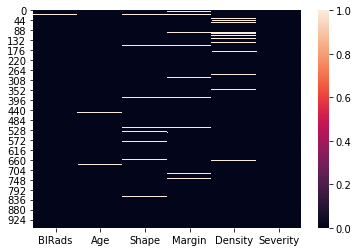

In [1674]:
#vizualizar los valores ausentes o NaN para preprocesarlos posteriormente
sn.heatmap(df.isna()) 

In [1675]:
df.Age.fillna(df.Age.mean(),inplace=True) # preprocesar valores ausentes NaN con la media del resto de la columna

In [1676]:
df.Shape.fillna(df.Shape.mean(),inplace=True)

In [1677]:
df.BIRads.fillna(df.BIRads.mean(),inplace=True)

In [1678]:
df.Margin.fillna(df.Margin.mean(),inplace=True)

In [1679]:
df.Density.fillna(df.Density.mean(),inplace=True)

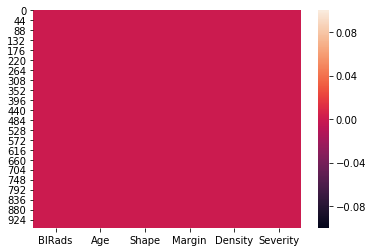

In [1680]:
sn.heatmap(df.isna())

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


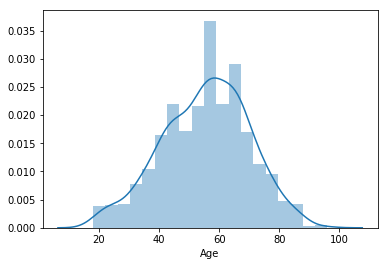

In [1681]:
sn.distplot(df.Age)

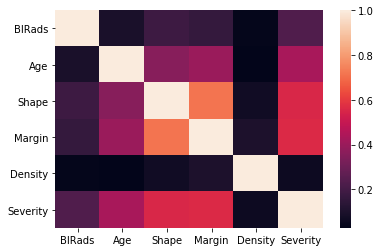

In [1682]:
sn.heatmap(df.corr())

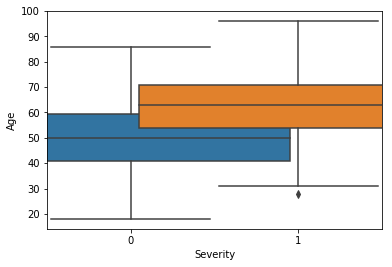

In [1683]:
sn.boxplot(df.Severity,df.Age,width=1.9)

In [1684]:
df.head()

,BIRads,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.000000,1
1,4.0,43.0,1.0,1.0,2.910734,1
2,5.0,58.0,4.0,5.0,3.000000,1
3,4.0,28.0,1.0,1.0,3.000000,0
4,5.0,74.0,1.0,5.0,2.910734,1


### a continuacion modelaremos sin realizar preprocesamiento de los datos para ver como mejora la efectividad del algoritmo cuando se realiza una correcta limpieza de los datos y preprocezamiento de los mismo

In [1685]:
# se dividen el set de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(df.drop('Severity',axis=1), df['Severity'], test_size=0.33, random_state=42)

In [1686]:
dt_clf = DecisionTreeClassifier() # se crea el modelo

In [1687]:
dt_clf.fit(X_train,y_train) # se entrena el modelo con los datos de entrenamiento

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1688]:
dt_pred = dt_clf.predict(X_test) # se predice el conjuto de datos de prueba en el modelo entrenado

In [1689]:
print(classification_report(y_test,dt_pred)) # metrica reporte de clasificacion con una efectividad de 75%

             precision    recall  f1-score   support

          0       0.73      0.83      0.78       169
          1       0.77      0.66      0.71       149

avg / total       0.75      0.75      0.75       318



#### preprocezamiento de los datos como escalado de los mismo entre 0 y 1 y seleccion de los mejores datos para alimentar el modelaje con los mejores datos de forma tal que mejore la eficiencia en la clasificacion

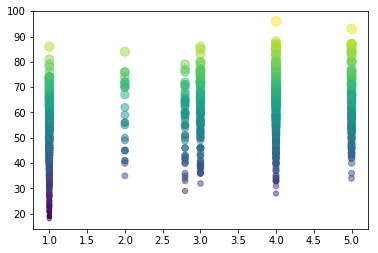

In [1690]:
plt.scatter(df['Margin'],df['Age'],s=df.Age,c=df.Age,cmap='viridis',alpha=0.5)

#### Preprocesamiento de datos

escalar los datos en una escala entre 0 y 1 con la funcion MinMaxSacaller()

In [1691]:
X = df[['BIRads','Age','Shape','Margin','Density']] # variable independientes

In [1692]:
y = df.Severity # variable dependiente o target la cual deseamos predecir

In [1693]:
scalarX = MinMaxScaler() # se crea el modelo para escalar los datos

In [1694]:
X = pd.DataFrame(scalarX.fit_transform(X), columns=X.columns) # se escalan los datos pasandolos al dataset

In [1695]:
X.head(10)# vizualizar datos escalados

,BIRads,Age,Shape,Margin,Density
0,0.090909,0.628205,0.666667,1.000000,0.666667
1,0.072727,0.320513,0.000000,0.000000,0.636911
2,0.090909,0.512821,1.000000,1.000000,0.666667
3,0.072727,0.128205,0.000000,0.000000,0.666667
4,0.090909,0.717949,0.000000,1.000000,0.636911
5,0.072727,0.602564,0.000000,0.449069,0.666667
6,0.072727,0.666667,0.573835,0.449069,0.666667
7,0.090909,0.307692,0.000000,0.449069,0.666667
8,0.090909,0.500000,0.000000,1.000000,0.666667
9,0.090909,0.538462,0.573835,1.000000,0.000000


### graficar los valores de entrada para encontrar anomalias en los mismo y vizualizar la distrinucion de los mismos

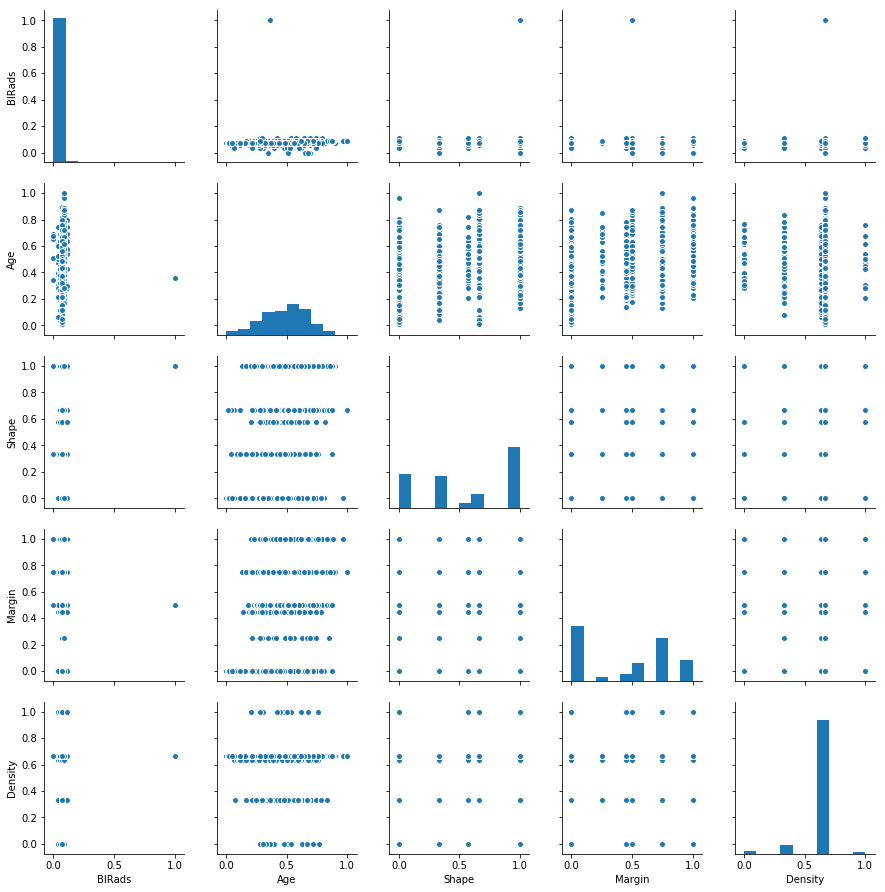

In [1696]:
sn.pairplot(X,palette="viridis") 

### en la grafias anteriores podemos inferir que existe un valor oulier o que esta fuera de la distribucion del resto de los mismo este dato es necesario eliminarlo ya que afecta el resultado final

In [1697]:

X[X.BIRads > 0.5] 
# eliminar los valores outliers, es decir valores que afectan el resultado porque esta 
# fuera de la distribucion normal de los valores 

,BIRads,Age,Shape,Margin,Density
340,1.0,0.358974,1.0,0.5,0.666667


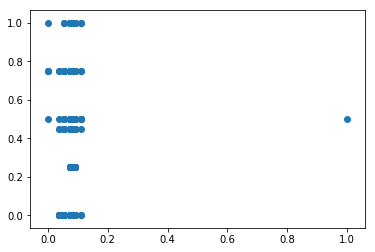

In [1698]:
plt.scatter(X.BIRads,X.Margin)

##### eliminando outliers

In [1699]:
X.drop(340,axis=0,inplace=True)
y.drop(340,axis=0,inplace=True)

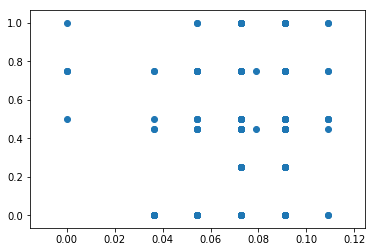

In [1700]:
plt.scatter(X.BIRads,X.Margin)

#### Una vez normalizados los datos procedemos a seleccionar los mejores datos

In [1701]:
select_mejores_datos = SelectKBest(k=4)

In [1702]:
len(y),len(X)

(960, 960)

In [1703]:
select_mejores_datos.fit_transform(X,y)

array([[0.09090909, 0.62820513, 0.66666667, 1.        ],
       [0.07272727, 0.32051282, 0.        , 0.        ],
       [0.09090909, 0.51282051, 1.        , 1.        ],
       ...,
       [0.07272727, 0.58974359, 1.        , 1.        ],
       [0.09090909, 0.61538462, 1.        , 1.        ],
       [0.07272727, 0.56410256, 0.66666667, 0.5       ]])

In [1704]:
mejores_datps = pd.DataFrame(select_mejores_datos.scores_,columns=['Datos'],index=X.columns)

### Listado organizado con los mejores datos

In [1705]:
print("Los mejores datos son:")
mejores_datps.sort_values('Datos',ascending=False)

Los mejores datos son:


,Datos
Margin,440.943763
Shape,423.842694
BIRads,326.306534
Age,219.618632
Density,3.613436


#####  creamoe nuevamente la variable X con las mejores 4 variables de entrada

In [1706]:
X = X[mejores_datps[:4].index]

In [1707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Modelaje del algoritmo de clasificacion DecisionTreeClassifier()

In [1708]:
clf_DTC = DecisionTreeClassifier()

In [1709]:
clf_DTC.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1710]:
DTC_predict = clf_DTC.predict(X_test)

In [1711]:
print(classification_report(y_test,DTC_predict))

             precision    recall  f1-score   support

          0       0.92      0.98      0.95       107
          1       0.97      0.89      0.93        85

avg / total       0.94      0.94      0.94       192



In [1712]:
results = pd.DataFrame([
    precision_score(y_test,DTC_predict),
    recall_score(y_test,DTC_predict),
    f1_score(y_test,DTC_predict)],index =['Precision','Recal','F1-score'],columns=['DecisionTreeClassifier']
)

In [1713]:
results  

,DecisionTreeClassifier
Precision,0.974359
Recal,0.894118
F1-score,0.932515


## Modelamos el modelo de clasificacion SVM 

In [1714]:
clf_SVM = SVC(C=2)

In [1715]:
clf_SVM.fit(X,y)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [1716]:
SVM_predict = clf_SVM.predict(X_test)

In [1717]:
print(classification_report(y_test,SVM_predict))

             precision    recall  f1-score   support

          0       0.87      0.80      0.83       107
          1       0.77      0.85      0.81        85

avg / total       0.83      0.82      0.82       192



In [1718]:
results['SVM'] = pd.DataFrame([precision_score(y_test,SVM_predict),
                              recall_score(y_test,SVM_predict),
                              f1_score(y_test,SVM_predict)],index =['Precision','Recal','F1-score'],columns=['SVM']
                              
                             )

In [1719]:
results.sort_values('Precision',axis=1,ascending=False)

,DecisionTreeClassifier,SVM
Precision,0.974359,0.774194
Recal,0.894118,0.847059
F1-score,0.932515,0.808989


## Modelaje de algoritmo de clasificacion GaussianNB

In [1720]:
clf_NB = GaussianNB()

In [1721]:
clf_NB.fit(X_train,y_train)

GaussianNB(priors=None)

In [1722]:
NB_predict = clf_NB.predict(X_test)

In [1723]:
clf_NB.score(X_test,y_test)

0.8333333333333334

In [1724]:
print(classification_report(y_test,NB_predict))

             precision    recall  f1-score   support

          0       0.90      0.79      0.84       107
          1       0.77      0.89      0.83        85

avg / total       0.84      0.83      0.83       192



In [1725]:
results['GaussianNB'] = pd.DataFrame([precision_score(y_test,NB_predict),
                       recall_score(y_test,NB_predict),
                       f1_score(y_test,NB_predict)],index=['Precision','Recal','F1-score'],columns=['GaussianNB'])

In [1726]:
results

,DecisionTreeClassifier,SVM,GaussianNB
Precision,0.974359,0.774194,0.767677
Recal,0.894118,0.847059,0.894118
F1-score,0.932515,0.808989,0.826087


## Modelaje del algoritmo de clasificacion KNeighborsClassifier

In [1727]:
clf_NN = KNeighborsClassifier(n_neighbors=2)

In [1728]:
clf_NN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [1729]:
NN_predict = clf_NN.predict(X_test)

In [1730]:
NN_predict

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [1731]:
results['KNN'] = pd.DataFrame([precision_score(y_test,NN_predict),
                       recall_score(y_test,NN_predict),
                       f1_score(y_test,NN_predict)],index=['Precision','Recal','F1-score'],columns=['KNN'])

In [1732]:
results

,DecisionTreeClassifier,SVM,GaussianNB,KNN
Precision,0.974359,0.774194,0.767677,0.750000
Recal,0.894118,0.847059,0.894118,0.635294
F1-score,0.932515,0.808989,0.826087,0.687898


Por la tabla de resultados inferimoe que el modelo que nos da mayor confianza en las predicciones es el de DecisionTreeClassifier


In [1733]:
from sklearn.externals import joblib

In [1734]:
nombre ='modelo_DTC.pkl'

In [1735]:
path ='./modelo/'

In [1736]:
joblib.dump(clf_DTC,nombre)# guardando el modelo para su uso posteriormente

['modelo_DTC.pkl']

In [1737]:
modelo = joblib.load('modelo_DTC') # importando el modelo guardado

In [1738]:
modelo.predict(X_test)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [ ]:
#### 